In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error


# 1.-  Problem Statement:
The objective of this analysis is to understand the relationship between median house value (dependent variable) and certain socio-economic characteristics (independent variables) in a given region. A linear regression analysis will be conducted using three independent variables: median income, population, and number of households.

# 2.-  Obtaining the Data

Source: Downloaded from [Kaggle California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

In [101]:
housing = pd.read_csv('housing.csv')

# 3.- Exploratory Data Analysis (EDA)

In [102]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='median_income', ylabel='median_house_value'>

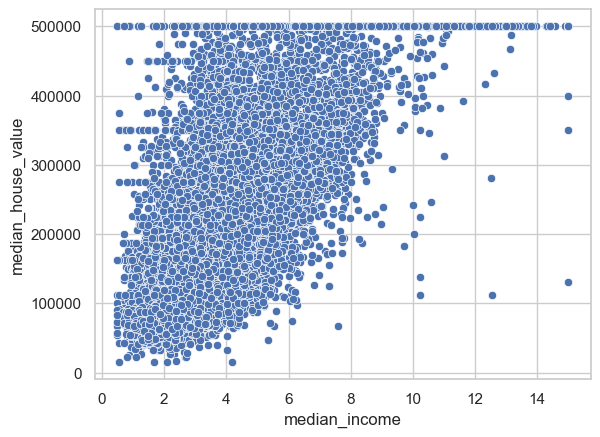

In [103]:
sns.scatterplot(x="median_income", y="median_house_value", data=housing)

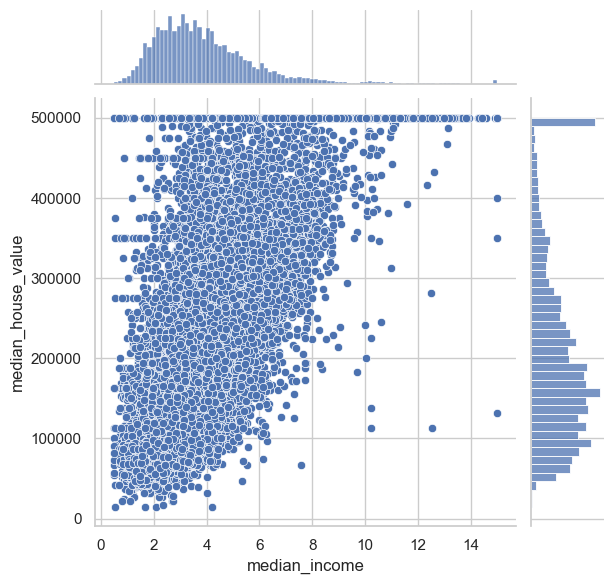

In [104]:
# using seaborn scatter plot, plot the median_house_value vs median_income

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="median_income", y="median_house_value", data=housing)

#### Interpretation 
The graph shows a positive relationship between median income and median house value. 

<Axes: xlabel='population', ylabel='median_house_value'>

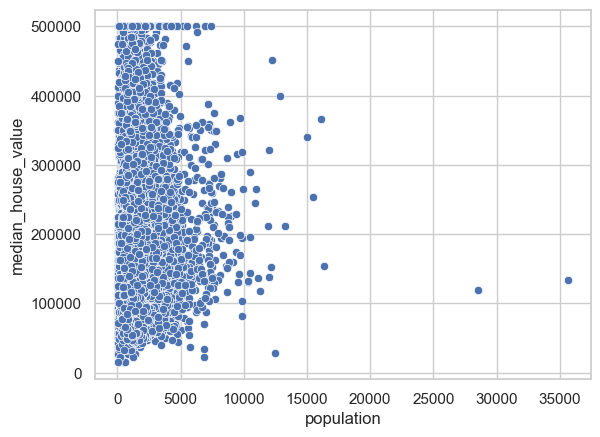

In [105]:
sns.scatterplot(x="population", y="median_house_value", data=housing)

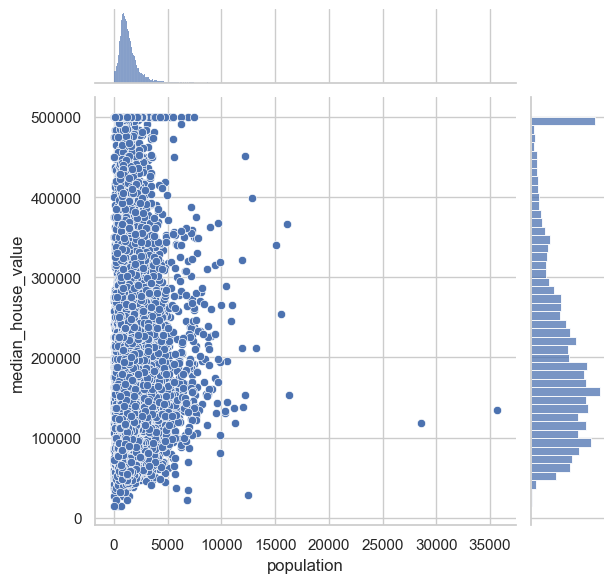

In [106]:
# using seaborn scatter plot, plot the median_house_value vs median_income

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="population", y="median_house_value", data=housing)

#### Interpretation

- There is no clear trend in this graph. The points are scattered without a defined direction. 
- There are outliers: some points that deviate significantly from the main data cloud. These points could represent areas with unique characteristics that affect the value of dwellings.

<Axes: xlabel='households', ylabel='median_house_value'>

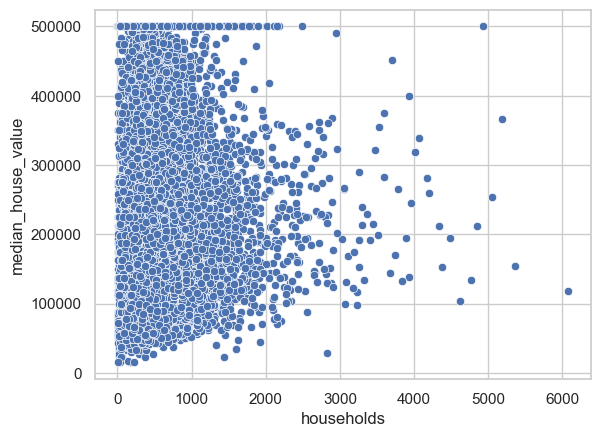

In [107]:
sns.scatterplot(x="households", y="median_house_value", data=housing)

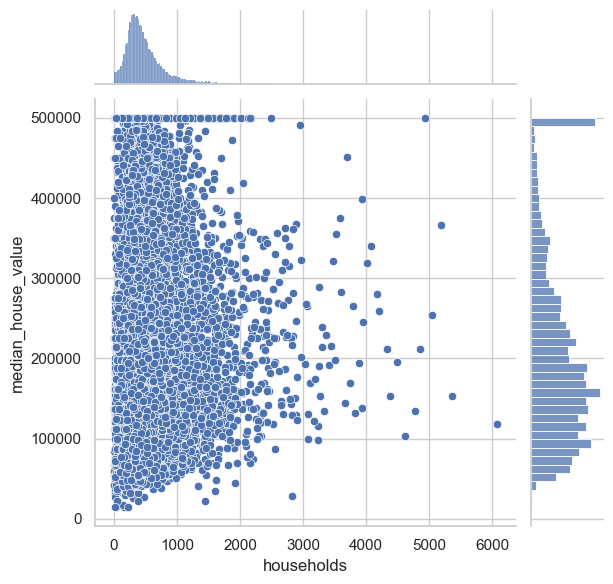

In [108]:
# using seaborn scatter plot, plot the median_house_value vs median_income

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="households", y="median_house_value", data=housing)

#### Iterpretation

- The number of households does not appear to be a determinant of housing value in this dataset. This means that, in general, the fact that there are more or fewer households in an area does not necessarily imply that houses are more or less expensive.

#### Description of the Variables Analysed
1. median_income: Represents the median income of households in a given area.
    - Range: Values vary from a minimum of 0.499900 to a maximum of 15.0001. This wide range indicates a great diversity in income levels between the different areas analysed.
    - Remarks: Median income is a key economic variable that is often strongly related to property values. 
2. Population: Indicates the total number of inhabitants in a specific area.
    - Range: Population varies significantly from a minimum of 3 to a maximum of 35682.
    - Remarks: Population is an important demographic factor that can influence housing values. 
3. Households: Represents the total number of households in a given area.
    - Range: The number of households varies with a minimum of 1 and a maximum of 6082.
    - Remarks: Like population, the number of households can influence housing demand and housing values.
4. median_house_value: Represents the average value of dwellings in a specific area.
    - Range: Values vary significantly with a minimum of 14999 and a maximum of 500001.
    - Remarks:  This is the dependent variable in our analysis. Our main objective is to understand which factors (such as income, population and number of households) influence housing values.


# Data Preprocessing

Filter out records with median_house_value = 500001 since it seems to be a cap for the median_house_value.

In [109]:
housing_preprocessed = housing[housing.median_house_value != 500001]

In [110]:
print(f"After filtering, there are {len(housing_preprocessed)} records, versus {len(housing)} before filtering")

After filtering, there are 19675 records, versus 20640 before filtering


Let's plot the same jointplot one more time to visualize the difference.

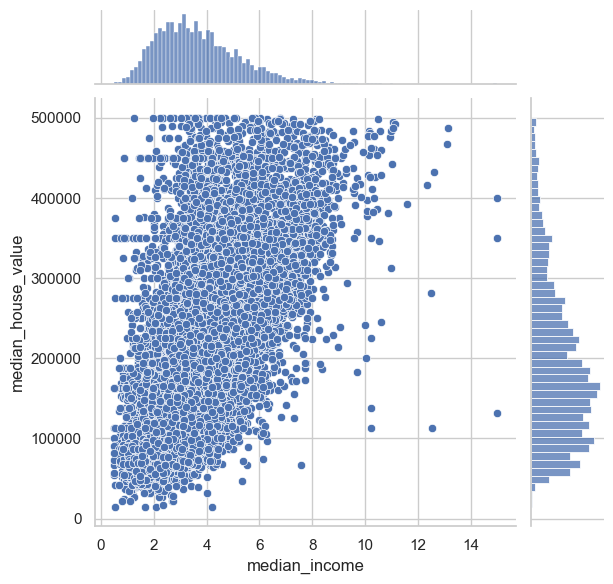

In [111]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="median_income", y="median_house_value", data=housing_preprocessed)

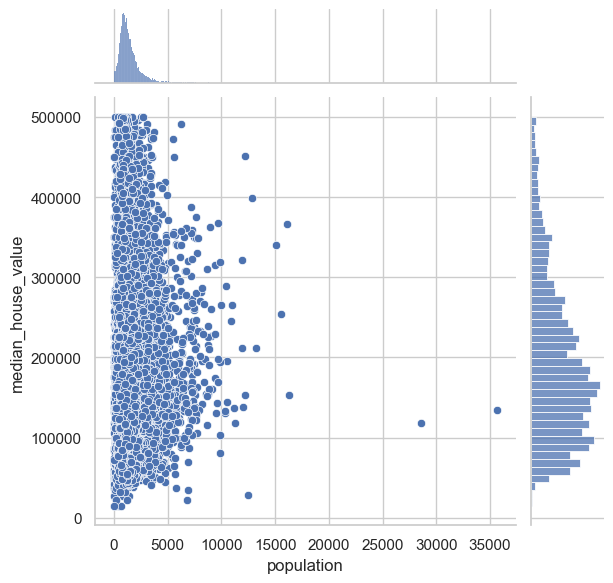

In [112]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="population", y="median_house_value", data=housing_preprocessed)

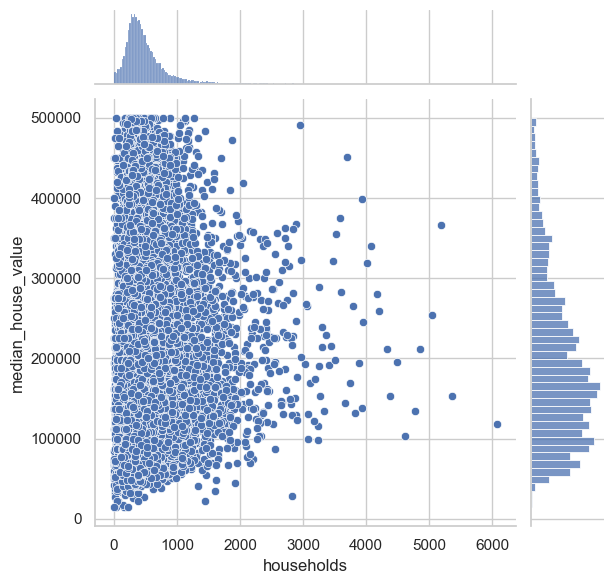

In [113]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="households", y="median_house_value", data=housing_preprocessed)

# 4.- Run three linear regressions , 5.- In a single table for all three linear regressions, provide per regression mode, 6.- Plot the resulting line on top of the scatter data for each of the three models


# Train and Test Split

Split the data into training/testing sets. 
Use the first 80% of the data for training.

In [114]:
train_size = int(len(housing_preprocessed) * 0.8)
train = housing_preprocessed[:train_size]
test = housing_preprocessed[train_size:]

Scatter plot, train in blue and test in red in the same plot

<Axes: xlabel='median_income', ylabel='median_house_value'>

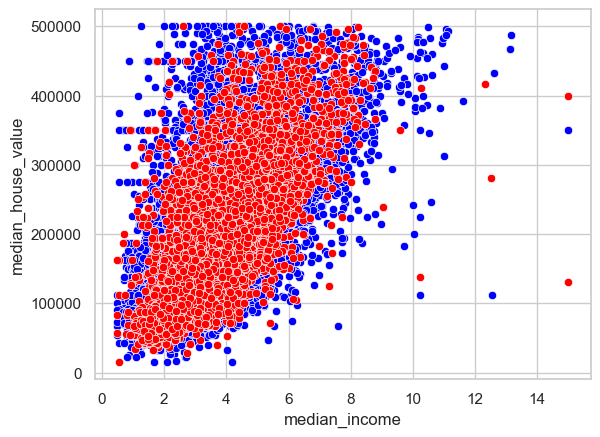

In [115]:
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")

<Axes: xlabel='population', ylabel='median_house_value'>

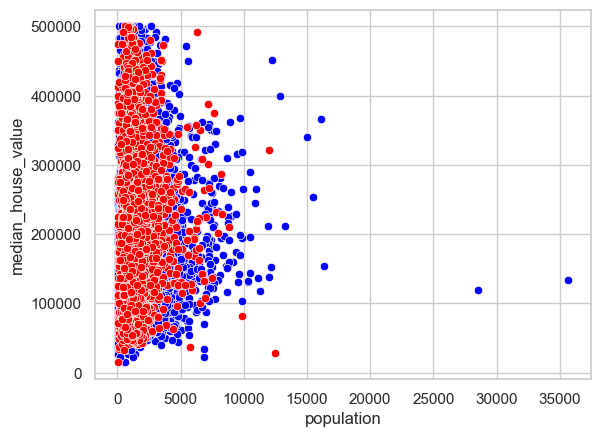

In [116]:
sns.scatterplot(x="population", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="population", y="median_house_value", data=test, color="red")

<Axes: xlabel='households', ylabel='median_house_value'>

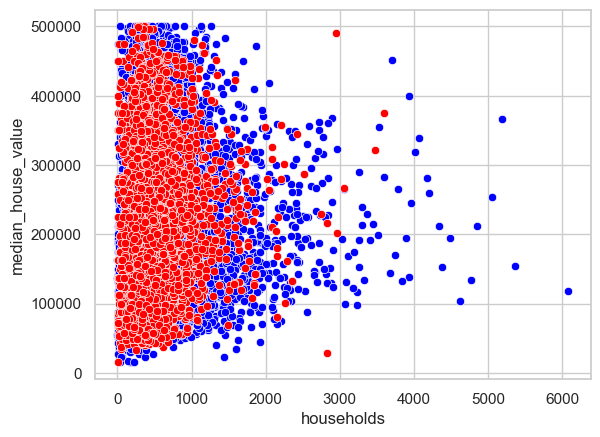

In [117]:
sns.scatterplot(x="households", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="households", y="median_house_value", data=test, color="red")

# Define a Model

Create a linear regression object

In [118]:
model = linear_model.LinearRegression()

# Train the Model --> Median income and Median house value

- Trainning the model with train Data

In [119]:
# fit
model.fit(X=train[["median_income"]], y=train[["median_house_value"]])

LinearRegression()

## Evaluate the Model

For the Train and Test data:

* Print the slope and intercept
* Plot the regression line on top of the scatter plot of the training data and  Mean Squared Error (MSE) and the Mean Absolute Error (MAE)

In [120]:
# print coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [48204.53436817]
Coefficients: [[38702.97233842]]


In [121]:
12*model.coef_ + model.intercept_

array([[512640.20242925]])

In [122]:
model.predict(X=[[12],[1],[100]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 512640.20242925],
       [  86907.50670659],
       [3918501.76821054]])

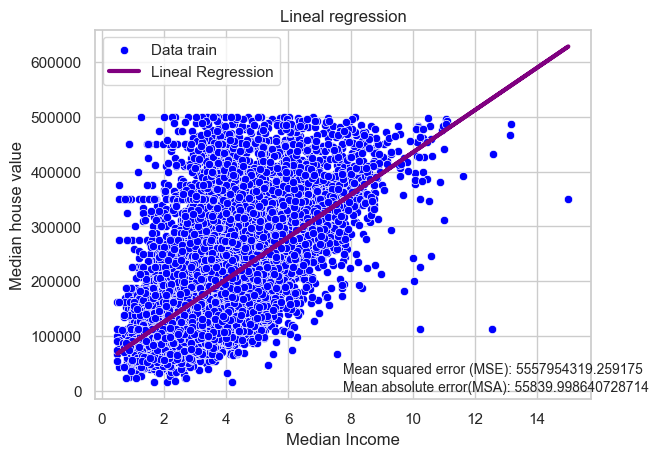

In [123]:

# plot the regression line against the training data
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue", label='Data train')
plt.plot(train[["median_income"]], model.predict(train[["median_income"]]), color="purple", linewidth=3, label='Lineal Regression')
plt.xlabel('Median Income')
plt.ylabel('Median house value')
plt.title('Lineal regression')

# Calculate MSE and MAE on the train set
textstr_mse =f"Mean squared error (MSE): {mean_squared_error(train[['median_house_value']], model.predict(train[['median_income']]))}"
plt.text(0.5, 0.10, textstr_mse, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

textstr_mae =f"Mean absolute error(MSA): {mean_absolute_error(train[['median_house_value']], model.predict(train[['median_income']]))}"
plt.text(0.5, 0.05, textstr_mae, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend()
plt.show()

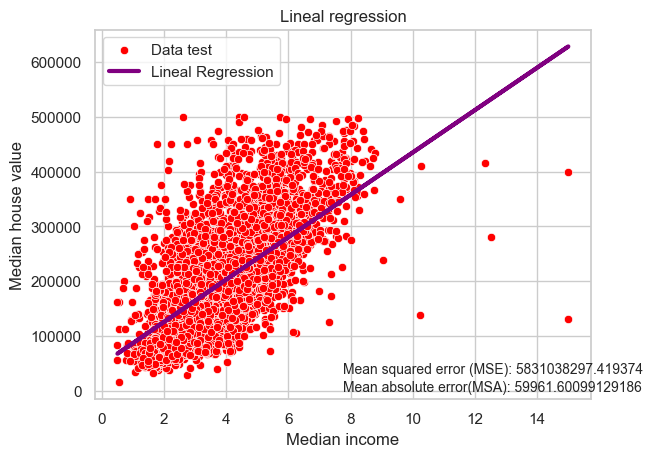

In [124]:
# plot the regression line against the test data
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red" , label='Data test')
plt.plot(test[["median_income"]], model.predict(test[["median_income"]]), color="purple", linewidth=3, label='Lineal Regression')

plt.xlabel('Median income')
plt.ylabel('Median house value')
plt.title('Lineal regression')

# Calculate MSE and MAE on the TEST set
textstr_mse =f"Mean squared error (MSE): {mean_squared_error(test[['median_house_value']], model.predict(test[['median_income']]))}"
plt.text(0.5, 0.10, textstr_mse, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

textstr_mae =f"Mean absolute error(MSA): {mean_absolute_error(test[['median_house_value']], model.predict(test[['median_income']]))}"
plt.text(0.5, 0.05, textstr_mae, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend()
plt.show()

# Train the Model --> Population and Median house value

In [125]:
# fit
model.fit(X=train[["population"]], y=train[["median_house_value"]])

LinearRegression()

## Evaluate the Model

For the Train and Test data:

* Print the slope and intercept
* Plot the regression line on top of the scatter plot of the training data and  Mean Squared Error (MSE) and the Mean Absolute Error (MAE)

In [126]:
# print coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [188081.58862584]
Coefficients: [[0.32862973]]


In [127]:
15000*model.coef_ + model.intercept_

array([[193011.03453271]])

In [128]:
model.predict(X=[[15000],[1000],[30000]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[193011.03453271],
       [188410.21835296],
       [197940.48043958]])

- To make the graph with the training data and calculate MSE and MAE on the train set

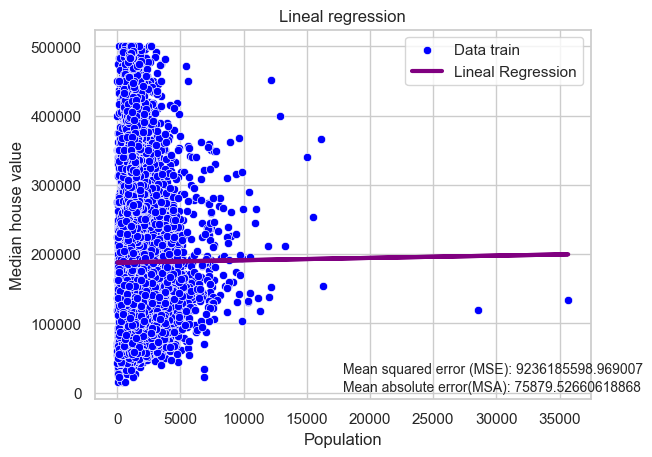

In [129]:

# plot the regression line against the training data
sns.scatterplot(x="population", y="median_house_value", data=train, color="blue", label='Data train')
plt.plot(train[["population"]], model.predict(train[["population"]]), color="purple", linewidth=3, label='Lineal Regression')
plt.xlabel('Population')
plt.ylabel('Median house value')
plt.title('Lineal regression')

# Calculate MSE and MAE on the train set
textstr_mse =f"Mean squared error (MSE): {mean_squared_error(train[['median_house_value']], model.predict(train[['population']]))}"
plt.text(0.5, 0.10, textstr_mse, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

textstr_mae =f"Mean absolute error(MSA): {mean_absolute_error(train[['median_house_value']], model.predict(train[['population']]))}"
plt.text(0.5, 0.05, textstr_mae, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend()
plt.show()

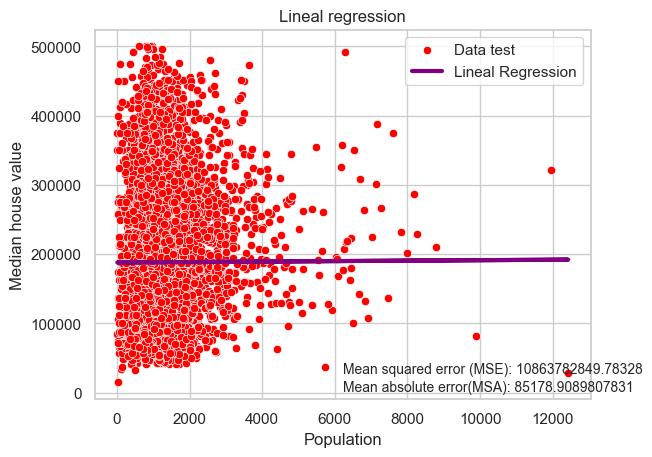

In [130]:
# plot the regression line against the test data
sns.scatterplot(x="population", y="median_house_value", data=test, color="red" , label='Data test')
plt.plot(test[["population"]], model.predict(test[["population"]]), color="purple", linewidth=3, label='Lineal Regression')

plt.xlabel('Population')
plt.ylabel('Median house value')
plt.title('Lineal regression')

# Calculate MSE and MAE on the TEST set
textstr_mse =f"Mean squared error (MSE): {mean_squared_error(test[['median_house_value']], model.predict(test[['population']]))}"
plt.text(0.5, 0.10, textstr_mse, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

textstr_mae =f"Mean absolute error(MSA): {mean_absolute_error(test[['median_house_value']], model.predict(test[['population']]))}"
plt.text(0.5, 0.05, textstr_mae, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend()
plt.show()

# Train the Model --> Households and Median house value

- Trainning the model with train Data

In [131]:
# fit
model.fit(X=train[["households"]], y=train[["median_house_value"]])

LinearRegression()

## Evaluate the Model

For the Train and Test data:

* Print the slope and intercept
* Plot the regression line on top of the scatter plot of the training data and  Mean Squared Error (MSE) and the Mean Absolute Error (MAE)

- Get coefficients

In [132]:
# print coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [177147.28853835]
Coefficients: [[22.62572591]]


- Test with data

In [133]:
3000*model.coef_ + model.intercept_

array([[245024.46626433]])

In [134]:
model.predict(X=[[3000],[800],[5000]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[245024.46626433],
       [195247.86926528],
       [290275.91808165]])

- To make the graph with the training data and calculate MSE and MAE on the train set

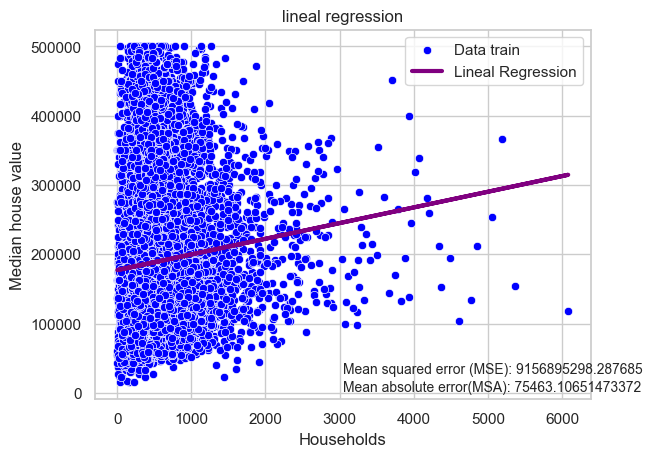

In [135]:
# plot the regression line against the training data
sns.scatterplot(x="households", y="median_house_value", data=train, color="blue", label='Data train')
plt.plot(train[["households"]], model.predict(train[["households"]]), color="purple", linewidth=3, label='Lineal Regression')
plt.xlabel('Households')
plt.ylabel('Median house value')
plt.title('lineal regression')

# Calculate MSE and MAE on the train set
textstr_mse =f"Mean squared error (MSE): {mean_squared_error(train[['median_house_value']], model.predict(train[['households']]))}"
plt.text(0.5, 0.10, textstr_mse, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

textstr_mae =f"Mean absolute error(MSA): {mean_absolute_error(train[['median_house_value']], model.predict(train[['households']]))}"
plt.text(0.5, 0.05, textstr_mae, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend()
plt.show()

- To make the graph with the test data and calculate MSE and MAE on the test set

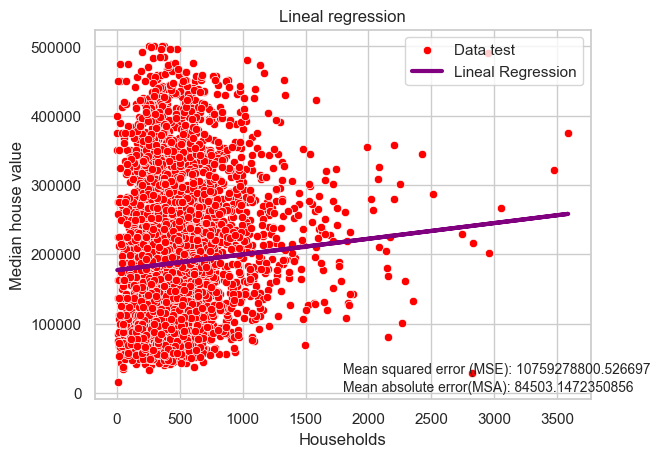

In [136]:
# plot the regression line against the test data
sns.scatterplot(x="households", y="median_house_value", data=test, color="red" , label='Data test')
plt.plot(test[["households"]], model.predict(test[["households"]]), color="purple", linewidth=3, label='Lineal Regression')

plt.xlabel('Households')
plt.ylabel('Median house value')
plt.title('Lineal regression')

# Calculate MSE and MAE on the TEST set
textstr_mse =f"Mean squared error (MSE): {mean_squared_error(test[['median_house_value']], model.predict(test[['households']]))}"
plt.text(0.5, 0.10, textstr_mse, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

textstr_mae =f"Mean absolute error(MSA): {mean_absolute_error(test[['median_house_value']], model.predict(test[['households']]))}"
plt.text(0.5, 0.05, textstr_mae, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend()
plt.show()

# 6.- Summary

- The Mean Squared Error (MSE) indicates how much the predictions deviate from the true value. A lower MSE value indicates that the model has better accuracy. In this case, the model with the variable ‘Median Income’ has the lowest MSE, therefore, it is the most accurate in predicting the value of the house.
- The Mean Absolute Error (MAE) is the average of the absolute differences between predictions and actual values. Like the MSE, a lower value is better. ‘Median Income also has the lowest MAE, which reinforces that this variable is a better predictor of housing value than the others.
- In the graphs, one can also observe the slopes of the regression line (coefficient) for each model. A steeper coefficient indicates that the independent variable has a greater impact on the dependent variable.
    - In the graph "Median Income" , the slope is quite steep, indicating a significant impact on the median house value.
    - In the ‘Population’ and ‘Households’ graphs, the slope is much less steep.

### Conclusion:

- Taking into account the MSE, MAE and visualisations, it is concluded that ‘Median Income’ has the highest impact on the prediction of median house value, followed by ‘Households’, while ‘Population’ has the lowest impact.

